# Normalization and Standardization

Read more at https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<H1>Read Data from CSV

In [2]:
#dfTrain = pd.read_csv('../input/HousePriceDS/HousePriceData.csv')   #Training Dataset
import requests
import io
url="https://manmohan291.s3.ap-south-1.amazonaws.com/HousePriceDS/HousePriceData.csv"
s=requests.get(url).content
dfTrain=pd.read_csv(io.StringIO(s.decode('utf-8')))

dfTrain.head()

,FloorArea,BedRooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


<h5> Visualize Data

# Visualize in 3D

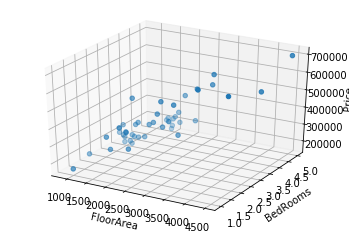

In [3]:
#%matplotlib notebook
plt3D = plt.figure().gca(projection='3d')
plt3D.scatter(dfTrain['FloorArea'], dfTrain['BedRooms'], dfTrain['Price'])
plt3D.set_xlabel('FloorArea')
plt3D.set_ylabel('BedRooms')
plt3D.set_zlabel('Price')
plt.show()

# Training

In [4]:
import sklearn.neighbors as KNN

df_Features=dfTrain.iloc[:,0:2]
df_Label=dfTrain.iloc[:,2:3]

X=df_Features.values
Y=df_Label.values


K=1
RegObj=KNN.KNeighborsRegressor(n_neighbors = K).fit(X,Y)


# Prediction

In [5]:
A = RegObj.predict([[4500,5]])[0][0]
B=RegObj.predict([[4500,4]])[0][0]

print(A,B)

699900.0 699900.0


### RMSE

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
pY=RegObj.predict(X)
mse=mean_squared_error(Y, pY)
rmse=np.sqrt(mse)
print("RMSE={0:.2f}".format(rmse))

RMSE=380175.57


# Plotting

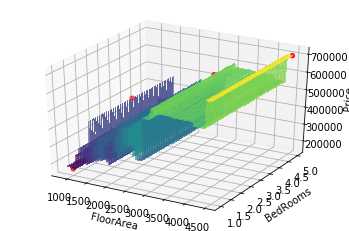

In [7]:
#%matplotlib notebook
x_min, x_max = X[:, 0].min() , X[:, 0].max() 
y_min, y_max = X[:, 1].min() , X[:, 1].max() 
u = np.linspace(x_min, x_max,150) 
v = np.linspace(y_min, y_max, 150) 

z = np.zeros(( len(u), len(v) )) 

U,V=np.meshgrid(u,v)


for i in range(len(u)): 
    for j in range(len(v)): 
        uv= np.column_stack((np.array([[u[i]]]),np.array([[v[j]]])))       
        pv =RegObj.predict(uv)        
        z[i,j] =pv[0][0]
z = np.transpose(z) 

fig = plt.figure()
plt3D = fig.add_subplot(111, projection='3d')   
plt3D.scatter(X[:,0],X[:,1],Y,marker="o",color="r")
 
plt3D.plot_surface(U,V,z,alpha=0.6,antialiased=False, shade=False,cmap='viridis')
plt3D.set_xlabel('FloorArea')
plt3D.set_ylabel('BedRooms')
plt3D.set_zlabel('Price')
plt.show()

# Why Normalize

Try prdicting for Floor Size=4500 with differnt No of Bedrooms (5 or 4 or even 1).
Prediction does not change even if we change No of Bedrooms to 1. 

In [8]:
A = RegObj.predict([[4500,5]])[0][0]
B=RegObj.predict([[4500,1]])[0][0]

print(A,B)

699900.0 699900.0


This is because both features are on differnt scale. Floor size is getting more weights due to big numbers.
To solve this problem, we nomralize the features.Keeping features on same scale provides solution which is not biased.



# Normalization/Standardization Methods

## Standard Scaler (Gaussian Distribution, Normal Curve, Bell Curve)

Changes X so that new Mean of new data will Zero and Standard Deviation will be One.
<img src="https://miro.medium.com/max/1240/1*dZlwWGNhFco5bmpfwYyLCQ.png" width=350 align=right>

$ \mu=\bar X =mean (X) $

$ \sigma =std.deviation (X) $

$ \displaystyle XNorm= ||X|| =\frac{X-\mu}{\sigma} $

## Min-Max Scaler
Changes X so that X will be within (0,1)

$ \displaystyle XNorm= \frac{X-Min(X)}{Max(X)-Min(X)} $


## Max Abs Scaler
Changes X so that X will be  within (-1,1)

$ \displaystyle XNorm= \frac{X}{|Max(X)|} $



## Normalizer
Changes X so that X length of each Vector is 1 unit.

$ \displaystyle XNorm= \frac{X}{||X||} $


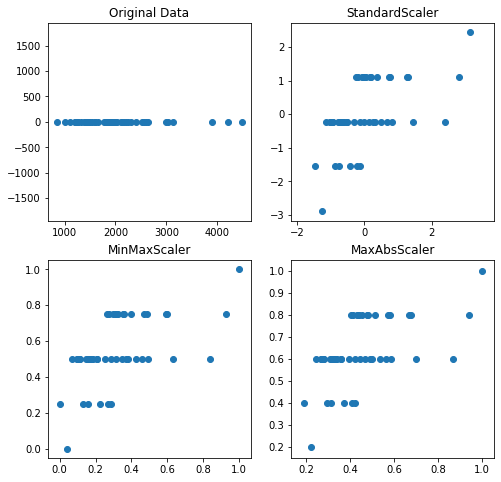

In [9]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,Normalizer

plt.figure(figsize=(8,8))
plt.subplot(2 , 2, 1)
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')
plt.title('Original Data')


plt.subplot(2 , 2, 2)
SS=StandardScaler()
XS=SS.fit_transform(X)
plt.scatter(XS[:,0],XS[:,1])
plt.axis('equal')
plt.title('StandardScaler')


plt.subplot(2 , 2, 3)
SS=MinMaxScaler()
XS=SS.fit_transform(X)
plt.scatter(XS[:,0],XS[:,1])
plt.axis('equal')
plt.title('MinMaxScaler')

plt.subplot(2 , 2, 4)
SS=MaxAbsScaler()
XS=SS.fit_transform(X)
plt.scatter(XS[:,0],XS[:,1])
plt.axis('equal')
plt.title('MaxAbsScaler')

plt.show()



In [17]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,Normalizer
K=1
#Preprocessing
SS=StandardScaler()
XS=SS.fit_transform(X)
#Train
RegObj=KNN.KNeighborsRegressor(n_neighbors = K).fit(XS,Y)
#Predict
RegObj.predict(SS.transform([[100,2]]))[0][0]

179900.0

# Using Pipeline

In [18]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('StandardScaler', StandardScaler()),
    ('KNeighborsRegressor', KNN.KNeighborsRegressor(n_neighbors = K)),    
    ])
pipeline.fit(X,Y)
pipeline.predict([[100,2]])[0][0]

179900.0

### Prediction after applying Normalization/Standardization

In [25]:
A = pipeline.predict([[4500,5]])[0][0]
B=pipeline.predict([[4500,1]])[0][0]

print(A,B)

699900.0 573900.0


### Plot 

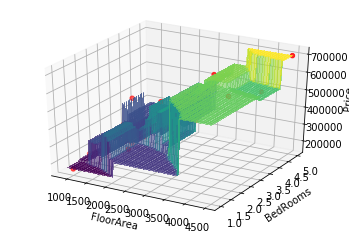

In [20]:
#%matplotlib notebook
x_min, x_max = X[:, 0].min() , X[:, 0].max() 
y_min, y_max = X[:, 1].min() , X[:, 1].max() 
u = np.linspace(x_min, x_max,100) 
v = np.linspace(y_min, y_max, 100) 

z = np.zeros(( len(u), len(v) )) 

U,V=np.meshgrid(u,v)


for i in range(len(u)): 
    for j in range(len(v)): 
        uv= np.column_stack((np.array([[u[i]]]),np.array([[v[j]]])))        
        pv =pipeline.predict(uv)        
        z[i,j] =pv[0][0]
z = np.transpose(z) 

fig = plt.figure()
plt3D = fig.add_subplot(111, projection='3d')   
plt3D.scatter(X[:,0],X[:,1],Y,marker="o",color="r")
 
plt3D.plot_surface(U,V,z,alpha=0.6,antialiased=False, shade=False,cmap='viridis')
plt3D.set_xlabel('FloorArea')
plt3D.set_ylabel('BedRooms')
plt3D.set_zlabel('Price')
plt.show()